In [1]:
from datetime import datetime, timedelta

from tqdm import tqdm
from pytz import timezone
############################## create api /

from alpaca_trade_api.rest import REST, TimeFrame
from alpaca_trade_api.stream import Stream

import alpaca_trade_api as tradeapi

import numpy as np


In [2]:
from TradingBot.strategy.backtest import RollingBackTest, APISettings, BackTest
import matplotlib.pyplot as plt


In [3]:
import yfinance as yf

In [4]:
from TradingBot.utils.data import get_data

In [5]:
# set time
nyc = timezone('America/New_York')
now = datetime.today().astimezone(nyc)
today_str = datetime.today()+ timedelta(1)
today_str = today_str.astimezone(nyc).strftime('%Y-%m-%d') 

In [6]:
print(today_str)

2022-10-25


# Rolling test

the max back is 30 days for 1min interval

In [9]:
# 1min only for recent 29days
def min1_momentum_rollingtest(test_length, momentum_settings):
    days_before = datetime.today() - timedelta(29)   # 1min, max = 29
    data_start_date = days_before.astimezone(nyc).strftime('%Y-%m-%d')
    start_testing_date = data_start_date
    testing_length = test_length
    gap=test_length


    rollingbacktest = RollingBackTest(
        momentum_settings,APISettings(),'momentum',start_testing_date,testing_length,
        'TQQQ','TQQQ','SQQQ',
        '1m',gap,False,False
    )

    #print(rollingbacktest.total_rets, '\n')

    #print(rollingbacktest.rets_noncomp, '\n')


    print('mean of cumulated ret: ', np.mean(rollingbacktest.total_rets), '\n')

    print('mean of non-cumulated ret: ', np.mean(rollingbacktest.rets_noncomp), '\n')
    plt.show()
    plt.plot(rollingbacktest.total_rets)
    plt.axhline(y=1, color='r', linestyle='-')
    #plt.ylim(0.8, 1.2)


start testing...


100%|██████████| 20/20 [00:08<00:00,  2.25it/s]

mean of cumulated ret:  0.9944570103918661 

mean of non-cumulated ret:  0.9999935348135445 



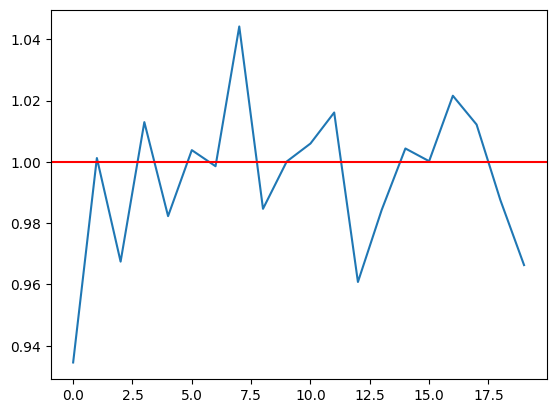

In [11]:
class Momentum_settings:
    '''
    if you found it is more likely to enter "long stage"
        - you should set higher threshold for short, but lower threshold for long
    '''
    long_buy_thres = 0.06
    long_sell_thres = 0
    short_buy_thres = 0.06
    short_sell_thres = 0
    slow_smooth_factor = 20 # long-term indicator as ema smooth factor
    # if larger, slower track of current price, more consistent
    fast_smooth_factor = 5 # price smooth factor for computing momentum



min1_momentum_rollingtest(1, Momentum_settings())

# Non-rolling test

In [19]:
# define testing func

def min1_momentum_nonrollingtest(test_length, momentum_settings):
    '''
    Introduction:
        - 1min level non-rolling backtesting for momentum strategy
        - for the recent `test_length` days (7 days max)
        - testing on TQQQ and SQQQ, signal from TQQQ
    
    Aruguments:
        - test_length int < 7
        - momentum_settings
            all hyperparameters
    
    '''
    days_before = datetime.today() - timedelta(test_length)  # if consistant. length should <7
    data_start_date = days_before.astimezone(nyc).strftime('%Y-%m-%d')

    back_test = BackTest(
        'momentum',
        momentum_settings,
        data_start_date,
        today_str,
        # data_start_date,
        # today_str,
        'TQQQ',
        'TQQQ',
        'SQQQ',
        '1m',
        'Open',
        True,
        False,
        True
    )


    print(back_test.total_suc, back_test.long_suc, back_test.short_suc)
    print(back_test.return_total, back_test.return_short, back_test.return_long)
    plt.show()
    plt.plot(back_test.totals)

0.4376657824933687 0.42913385826771655 0.45528455284552843
0.9399036659516627 0.9583767046116658 0.9807246580899645


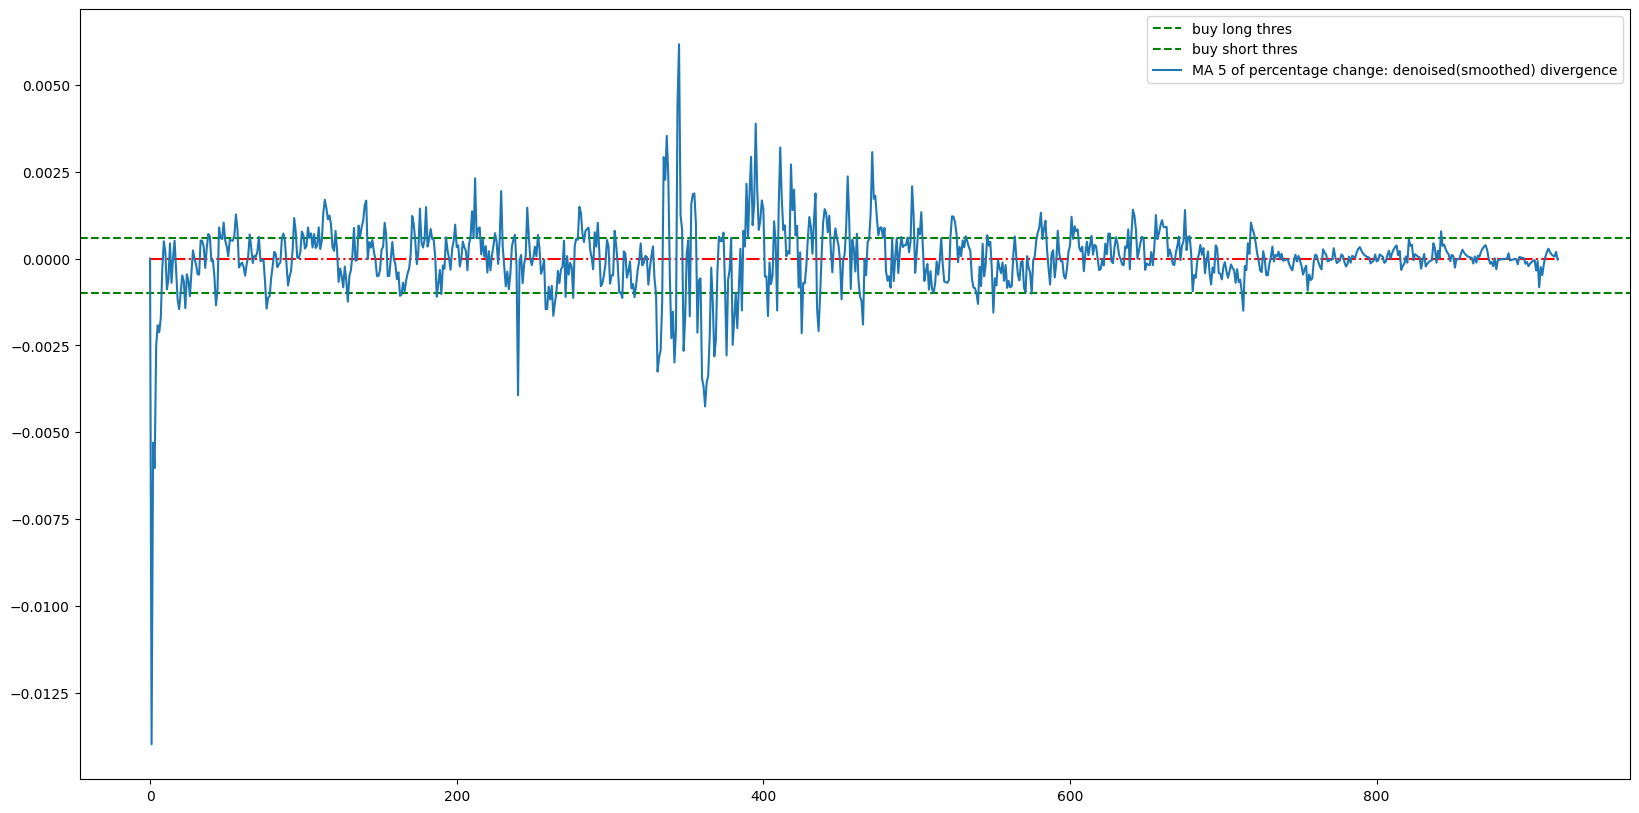

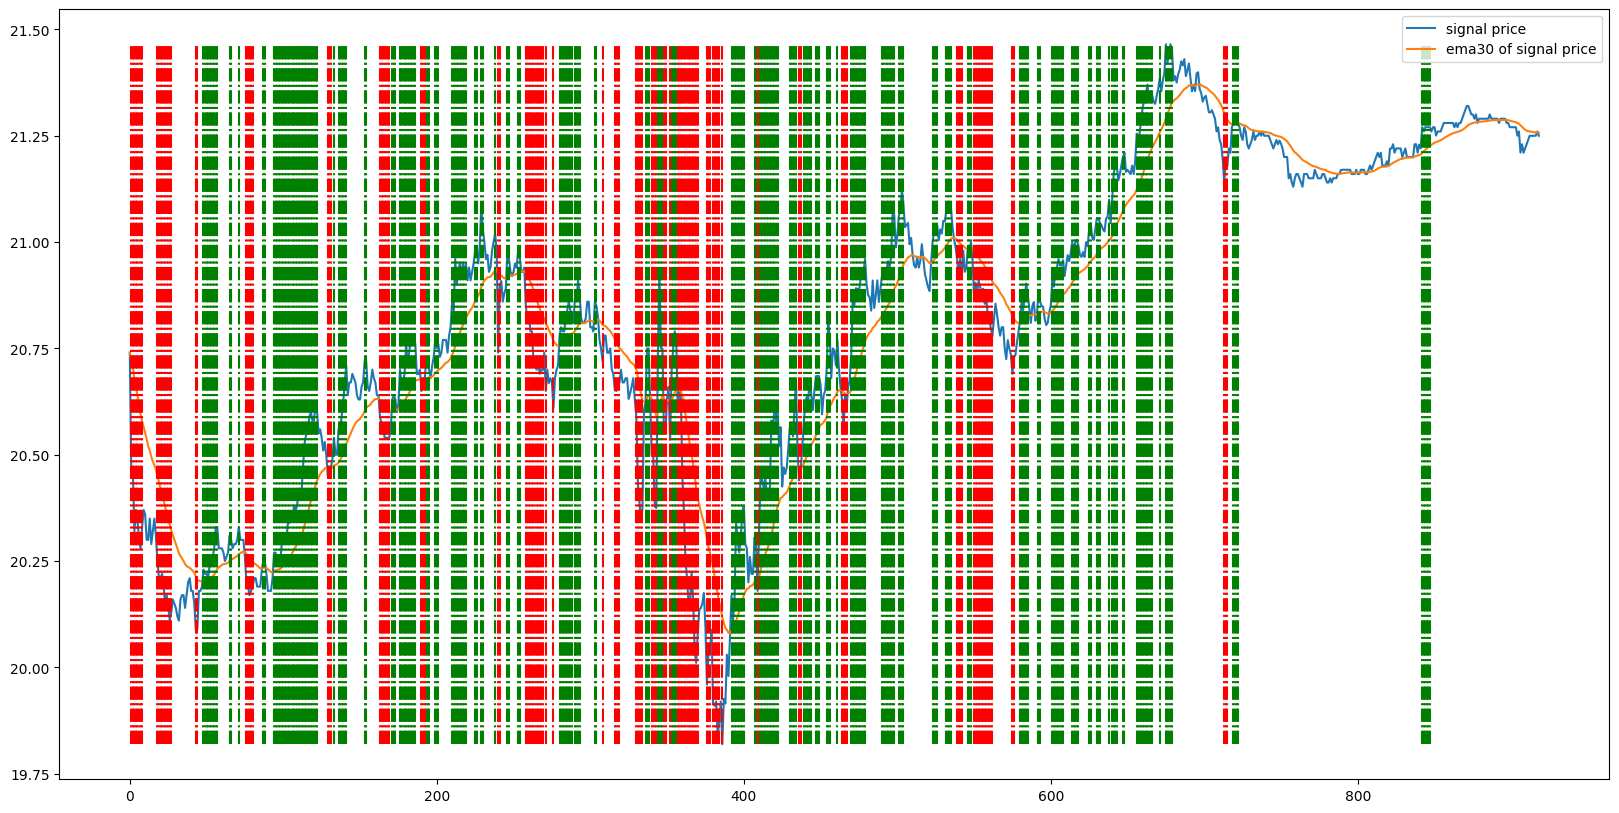

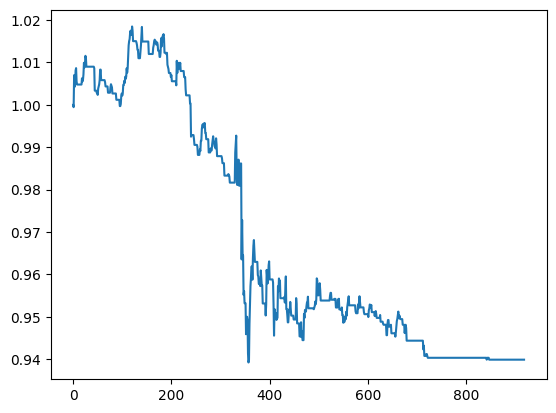

In [21]:
# test hyper1

class Momentum_settings:
    '''
    if you found it is more likely to enter "long stage"
        - you should set higher threshold for short, but lower threshold for long
    '''
    long_buy_thres = 0.06
    long_sell_thres = 0
    short_buy_thres = 0.1
    short_sell_thres = 0
    slow_smooth_factor = 30 # long-term indicator as ema smooth factor
    # if larger, slower track of current price, more consistent
    fast_smooth_factor = 5 # price smooth factor for computing momentum

min1_momentum_nonrollingtest(2, Momentum_settings())